# Decision Tree with Support Vector Machines - Credit Card Fraud

## Setup

In [1]:
# Install necessary libraries
%pip install pandas==2.2.3
%pip install scikit-learn==1.6.0
%pip install matplotlib==3.9.3

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
# Import necessary libraries
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

## Accessing the dataset

In [13]:
# Set path to the dataset
# path = '..\_program resources\creditcard.csv' # Previous location (moved out of GitHub due to size)
df = pd.read_csv("C:/Users/Andrew-John/Documents/_Github/lessons/personal/_resources/APTSHBA.csv")

# Assign the path to a dataframe 
# df = pd.read_csv(path)

# Display the head and tail of the dataframe
df

,#,Content,GoogleMapsLink,Link,Bedrooms,Bathrooms,SQFT,Photos,MonthlyCost,FullAddress,...,HigherOrLowerThanAverage,AboveBelowAveragePopulation,Households,White,Hispanic,Black,Asian,Mixed,Other,Sum
0,6,"9915 E Franklin Ave9915 E Franklin Ave, Glenn ...",https://www.google.com/maps/place/9915+E+Frank...,https://www.apartments.com/9915-e-franklin-ave...,1,1,--\r\n,10,650.00,"9915 E Franklin Ave, Glenn Dale, MD 20769",...,Lower than Average Population,-0.81,2175,0.15,0.09,0.64,0.07,0.04,0.01,1.0
1,3,"5122 Decatur St5122 Decatur St, Hyattsville, M...",https://www.google.com/maps/place/5122+Decatur...,https://www.apartments.com/5122-decatur-st-hya...,1,1,--\r\n,3,750.00,"5122 Decatur St, Hyattsville, MD 20781",...,Lower than Average Population,-0.70,3853,0.24,0.40,0.31,0.02,0.02,0.01,1.0
2,19,"1961 Lewis Ave1961 Lewis Ave, Rockville, MD 20851",https://www.google.com/maps/place/1961+Lewis+A...,https://www.apartments.com/1961-lewis-ave-rock...,1,1,150,8,"1,200.00","1961 Lewis Ave, Rockville, MD 20851",...,Lower than Average Population,-0.60,4891,0.36,0.36,0.09,0.15,0.04,0.00,1.0
3,37,"403 Calvin Ln, Rockville, MD 20851",https://www.google.com/maps/place/403+Calvin+L...,https://www.apartments.com/403-calvin-ln-rockv...,1,1,--\r\n,2,750.00,"403 Calvin Ln, Rockville, MD 20851",...,Lower than Average Population,-0.60,4891,0.36,0.36,0.09,0.15,0.04,0.00,1.0
4,16,"7726 Acrocomia Dr7726 Acrocomia Dr, Severn, MD...",https://www.google.com/maps/place/7726+Acrocom...,https://www.apartments.com/7726-acrocomia-dr-s...,1,1,--\r\n,19,949.00,"7726 Acrocomia Dr, Severn, MD 21076",...,Lower than Average Population,-0.57,6348,0.47,0.05,0.27,0.15,0.05,0.01,1.0
5,25,"2863 Chain Bridge Rd2863 Chain Bridge Rd, Vien...",https://www.google.com/maps/place/2863+Chain+B...,https://www.apartments.com/2863-chain-bridge-r...,1,1,188,21,850.00,"2863 Chain Bridge Rd, Vienna, VA 22181",...,Lower than Average Population,-0.58,5233,0.64,0.10,0.05,0.16,0.04,0.00,1.0
6,9,"2235 Quincy St NE2235 Quincy St NE, Washington...",https://www.google.com/maps/place/2235+Quincy+...,https://www.apartments.com/2235-quincy-st-ne-w...,1,1,--\r\n,20,"1,000.00","2235 Quincy St NE, Washington, DC 20018",...,Lower than Average Population,-0.46,7861,0.12,0.04,0.81,0.01,0.01,0.00,1.0
7,10,"3504 18th St NE3504 18th St NE, Washington, DC...",https://www.google.com/maps/place/3504+18th+St...,https://www.apartments.com/3504-18th-st-ne-was...,1,1,--\r\n,20,975.00,"3504 18th St NE, Washington, DC 20018",...,Lower than Average Population,-0.46,7861,0.12,0.04,0.81,0.01,0.01,0.00,1.0
8,44,"2609 Franklin St NE, Washington, DC 20018",https://www.google.com/maps/place/2609+Frankli...,https://www.apartments.com/2609-franklin-st-ne...,1,1,--\r\n,15,825.00,"2609 Franklin St NE, Washington, DC 20018",...,Lower than Average Population,-0.46,7861,0.12,0.04,0.81,0.01,0.01,0.00,1.0
9,18,"5220 57th Ave5220 57th Ave, Riverdale, MD 20737",https://www.google.com/maps/place/5220+57th+Av...,https://www.apartments.com/5220-57th-ave-river...,1,1,110,2,680.00,"5220 57th Ave, Riverdale, MD 20737",...,Lower than Average Population,-0.41,5798,0.12,0.49,0.33,0.03,0.02,0.01,1.0


## Reviewing the Dataset

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        5
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        3
20        1
21        1
22        1
23        1
24        1
25        1
26        3
27        4
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        1
45    #REF!
Name: Bedrooms, dtype: object


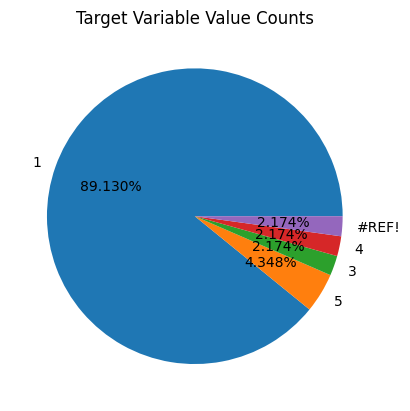

In [16]:
print(df.Bedrooms)
# get distinct classes
labels = df.Bedrooms.unique()
#get the count of each distinct class
sizes = df.Bedrooms.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [18]:
# Plot a correlation graph to determine most correlated features
correlation_values = df.corr()['Bedrooms'].drop('Bedrooms')
correlation_values.plot(kind='barh', figsize=(10,6))

ValueError: could not convert string to float: '9915 E Franklin Ave9915 E Franklin Ave, Glenn Dale, MD 20769'

## Preprocessing

In [6]:
# Feature 'Time' is excluded
# Class will be target variable
# Features 2 to 30 will be input features 

# standardize features by removing the mean and scaling to unit variance
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
df_matrix = df.values

# X: feature matrix (time excluded)
X = df_matrix[:, 1:30]

# y: labels vector
y = df_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

## Train/Test Split

In [7]:
# Split training and test data at 30%. Random state 42 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Build a Decision Tree Classifier model

In [8]:
# Compute sample weights
w_train = compute_sample_weight('balanced', y_train)

In [9]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

## Build a Support Vector Machine (SVM) model

What is a SVM?
- It's a supervised machine learning algorithm that can be used for classification or regression challenges.
- It performs classification by finding the hyperplane that best divides a dataset into two classes.

What's a hyperplane?
- A hyperplane is a flat affine subspace of one dimension less than its ambient space.
- For example, in 3D space, a hyperplane is a 2D plane. In 2D space, a hyperplane is a line.

LinearSVC is a linear Support Vector Machine classifier 
- The loss function is set to 'hinge' for the hinge loss function and no intercept term
    - What is hinge loss?
        - Hinge loss is a loss function used for "maximum-margin" classification, most notably for support vector machines (SVMs).
    - What is maximum-margin classification?
        - Maximum-margin classification is a type of classification that aims to find the hyperplane that maximizes the margin between different classes.
    - Why is it important to maximize the margin?
        - Maximizing the margin helps to improve the generalization of the model, making it less sensitive to noise in the training data.
- The class_weight parameter is set to 'balanced' to handle class imbalance
- The random_state parameter is set to 31 for reproducibility
- The fit_intercept parameter is set to False to exclude the intercept term from the model

In [10]:
# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# fit the model
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

## Evaluate the Decision Tree Classifier Models

What is predict_proba?
- predict_log_proba returns the log of the probability estimates for all classes
- The first column is the probability of class 0, the second column is the probability of class 1

What is predict_proba?
- predict_proba returns the probability estimates for all classes for the input samples. 
- The result is an array of shape (n_samples, n_classes) where n_samples is the number of samples and n_classes is the number of classes.
- The first column of the array contains the probability of the negative class (0) and the second column contains the probability of the positive class (1).
- The probability of the positive class is obtained by taking the second column of the array.

In [11]:
# predict the probability of the positive class
y_pred_dt = dt.predict_proba(X_test)[:,1]

What is roc_auc_score?
- The ROC AUC score is a performance measurement for classification problems at various threshold settings.
- It tells how much the model is capable of distinguishing between classes. AUC is the area under the ROC curve,
- This plots the true positive rate against the false positive rate at various threshold settings.

In [12]:
# Measure the ROC-AUC score for Decision Tree
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Decision Tree ROC-AUC: {0:.3f}".format(roc_auc_dt))

Decision Tree ROC-AUC: 0.939


Observations
- I observe the ROC-AUC score for SVM
- Close to 1.0 indicates a good model
- Close to 0.5 indicates a poor model

## Evaluate the Support Vector Machine Models

What is decision_function?
- The decision function is the distance of the samples to the hyperplane.
- It is used to determine the class of the sample.
- If the decision function is positive, the sample is classified as the positive class.
- If the decision function is negative, the sample is classified as the negative class.

In [13]:
# predict the decision function
y_pred_svm = svm.decision_function(X_test)

In [14]:
# Run the roc_auc_score function to measure the ROC-AUC score for SVM
# The ROC-AUC score is a measure of the model's ability to distinguish between classes
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC: 0.986


I observe that the ROC-AUC score for the SVM model is higher than the Decision Tree model 

## Practice Exercises

### Q1 - What are the top 6 correleated features of the dataset for the target variable 'Class'?

In [15]:
# Filter to the top 6 features (most correlated with the target variable 'Class')
correlation_values = abs(df.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

### Q2, Q3, Q4, Q5 - Use the top 6 features to re-run the models and check for differences

In [16]:
# Use the top 6 features to create a new dataframe and recreate the earlier steps to re-assess
X = df_matrix[:, [3,10,12,14,16,17]]
y = df_matrix[:, 30]
X = normalize(X, norm="l1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
w_train = compute_sample_weight('balanced', y_train)

# Prepare the Decision Tree model with the top 6 features and measure the ROC-AUC score
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)
y_pred_dt = dt.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

# Prepare the SVM model with the top 6 features and measure the ROC-AUC score
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)
y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

Decision Tree ROC-AUC score : 0.952
SVM ROC-AUC score: 0.937


#### Observations
- I observe that the ROC-AUC score for the Decision Tree model is higher with just the top 6 features
- I observe that the ROC-AUC score for the SVM model is lower with just the top 6 features

#### Why is this the case?
- The SVM model is more sensitive to the number of features and the scaling of the data
- The Decision Tree model is less sensitive to the number of features and the scaling of the data